In [2]:
import numpy as np
from numpy.random import default_rng

In [3]:
rng = default_rng()

mu = np.array([1.2, 3])

sigma = np.array([[1.0, 0.9],
                [0.9, 1.0]])

sigma.shape

Xn = rng.multivariate_normal(mu, sigma, size=1500, method='cholesky')

In [30]:
from scipy.stats import spearmanr,pearsonr

In [20]:
spearmanr(a=Xn)

SpearmanrResult(correlation=0.8870741080329371, pvalue=0.0)

In [25]:
pearsonr(Xn[:,0], Xn[:,1])

(0.8978598257197843, 0.0)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
telco = pd.read_csv('../data/Telco-Customer-Churn.csv')

In [36]:
telco = telco[~pd.isna(telco.MonthlyCharges)]

In [39]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
pearsonr(telco.tenure, telco.MonthlyCharges)[0]


0.24789985628615008

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

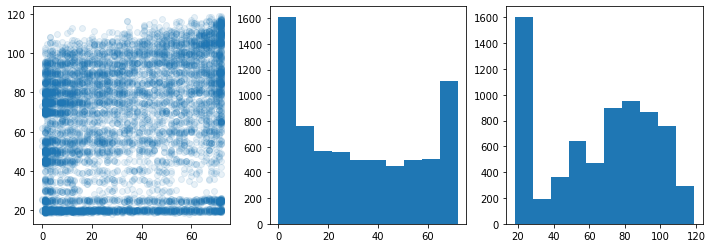

In [46]:
plt.subplots(1,3, figsize=(12,4))
plt.subplot(131)
plt.scatter(telco.tenure, telco.MonthlyCharges, alpha=0.1);

plt.subplot(132)
plt.hist(telco.tenure)

plt.subplot(133)
plt.hist(telco.MonthlyCharges);

## Return vectors with desired correlation

In [88]:
from scipy.interpolate import Akima1DInterpolator
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import spearmanr,pearsonr, norm
from numpy.random import default_rng

In [108]:
def modify_correlation(df, col1, col2, rho):
    # estimate/interpolate cdf for col1 and col2
    ecdf1 = ECDF(df[col1])
    Finv_step = np.hstack((df[col1].min(), ecdf1.x[1:-1], df[col1].max()))
    U = np.hstack((0.0, ecdf1.y[1:-1], 1.0))
    Finv = Akima1DInterpolator(U, Finv_step)

    ecdf2 = ECDF(df[col2])
    Ginv_step = np.hstack((df[col2].min(), ecdf2.x[1:-1], df[col2].max()))
    U = np.hstack((0.0, ecdf2.y[1:-1], 1.0))
    Ginv = Akima1DInterpolator(U, Ginv_step)
    
    # print original correlation
    org_corr = spearmanr(df[col1], df[col2])
    #print(f'The original spearman correlation is {org_corr[0]:.2f}.')
    
    # sample multivariate normal with desired correlation
    rng = default_rng()
    mu = np.zeros(2)
    sigma = np.ones((2,2))
    sigma[0,1] = sigma[1,0] = rho
    Xn = rng.multivariate_normal(mu, sigma, size=df.shape[0], method='cholesky')
    
    # apply norm cdf to array
    Yn = norm.cdf(Xn)
    
    # apply Finv, Ginv
    new_col1 = Finv(Yn[:,0])
    new_col2 = Ginv(Yn[:,1])
    
    df2 = df.copy(deep=True)
    df2[col1] = new_col1
    df2[col2] = new_col2
    
    # return df
    return df2

In [72]:
sig = np.ones((2,2))

In [73]:
sig[0,1] = sig[1,0] = 0.7

In [74]:
sig

array([[1. , 0.7],
       [0.7, 1. ]])

In [109]:
df2 = modify_correlation(telco, 'tenure', 'MonthlyCharges', -0.7)

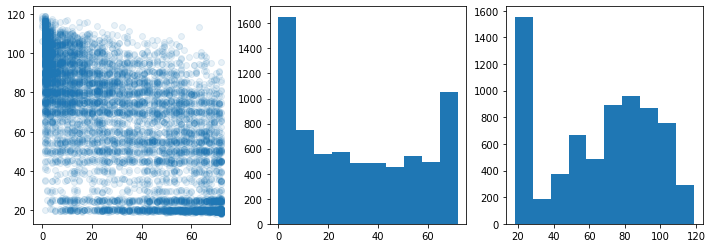

In [111]:
plt.subplots(1,3, figsize=(12,4))
plt.subplot(131)
plt.scatter(df2.tenure, df2.MonthlyCharges, alpha=0.1);

plt.subplot(132)
plt.hist(df2.tenure)

plt.subplot(133)
plt.hist(df2.MonthlyCharges);

In [102]:
pearsonr(v1, v2)

(-0.6402183844033776, 0.0)

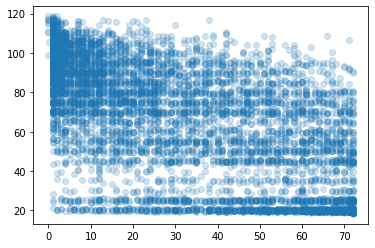

In [103]:
plt.scatter(v1, v2, alpha=0.2)

In [91]:
Xn[:10,:]

array([[ 2.88607719,  0.761289  ],
       [ 0.31803021,  0.01602923],
       [ 0.28666276,  0.14465615],
       [-2.31430676, -1.41020459],
       [-1.67989029, -1.9960003 ],
       [ 0.85276192,  0.28645789],
       [ 1.78484358,  0.05162603],
       [ 0.80193872,  0.00764805],
       [-0.04114375,  0.36384842],
       [-0.54813964, -0.73346407]])

In [92]:
Yn[:10, :]

array([[0.99804962, 0.77675777],
       [0.62476899, 0.50639446],
       [0.61281472, 0.55750882],
       [0.01032545, 0.07923964],
       [0.04648933, 0.02296695],
       [0.80310433, 0.61273628],
       [0.96285665, 0.52058666],
       [0.7887058 , 0.5030511 ],
       [0.48359065, 0.6420144 ],
       [0.29179801, 0.23163772]])

In [87]:
np.apply_along_axis?